1792.2829287008435
[ 0.02886567 -0.07421539 -0.00044617 -0.06755969  0.07287211  0.12392026
 -0.21263357 -0.12287874 -0.09281523  0.02934532]


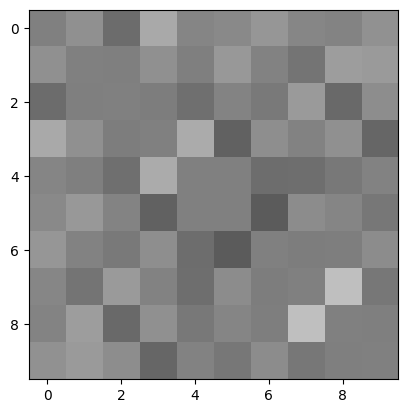

In [139]:
%reset -f 
import numpy as np
import matplotlib.pyplot as plt
import scipy.sparse as sp

# Set the random seed for reproducibility
# np.random.seed(1)

n = 10  # number of spins
Jth = 0.1  # Jth sets the size of the random threshold values th
full_network = True  # Toggle between full and sparse Ising network

if full_network:
    # Full weight matrix
    J0 = 0  # J0 and J are as defined for the SK model
    J = 0.5
    w = J0/n + J/np.sqrt(n) * np.random.randn(n, n)
    w = np.triu(w, 1)  # Keep upper triangular part
    w += w.T  # Make the matrix symmetric
    c = ~(w == 0)  # Neighborhood graph fully connected
else:
    # Sparse weight matrix
    c1 = 0.5  # Connectivity is the approximate fraction of non-zero links in the random graph on n spins
    beta = 0.5
    w = sp.rand(n, n, density=c1, format='csr')
    w.data = np.random.choice([-beta, beta], size=w.nnz)  # Assign +/-beta randomly to non-zero links
    w = (w + w.T) / 2  # Make the matrix symmetric
    c = ~(w.toarray() == 0)  # Sparse 0,1 neighborhood graph

th = np.random.randn(n) * Jth
# Exact
def s_all(n):
    """Generate all 2^n spin configurations for n spins."""
    return np.array(np.meshgrid(*[[1, -1]] * n)).T.reshape(-1, n)

# Get energy for all spin configurations
sa = s_all(n)  # All 2^n spin configurations
Ea = 0.5 * np.sum(sa * (w @ sa.T).T, axis=1) + sa @ th  # Energies of all 2^n configurations
Ea = np.exp(Ea)
plt.imshow(w, cmap='gray', vmin=-1, vmax=1)
Z = np.sum(Ea)
print(Z)
p_ex = Ea / Z  # Probabilities of all 2^n configurations

# Get mean values and correlations
m_ex = sa.T @ p_ex  # Exact mean values of n spins
print(m_ex)
klad = (p_ex[:, None] * sa)
chi_ex = sa.T @ klad - np.outer(m_ex, m_ex)  # Exact connected correlations
